In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt


In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train, x_test=x_train/255.0,x_test/255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [4]:
i=Input(shape=x_train[0].shape)
x=LSTM(128)(i)
x=Dense(10,activation='softmax')(x)
model=Model(i,x)

In [7]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
r=model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.3503 - accuracy: 0.8853 - val_loss: 0.1324 - val_accuracy: 0.9598
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1074 - accuracy: 0.9679 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.0882 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0684 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0460 - val_ac

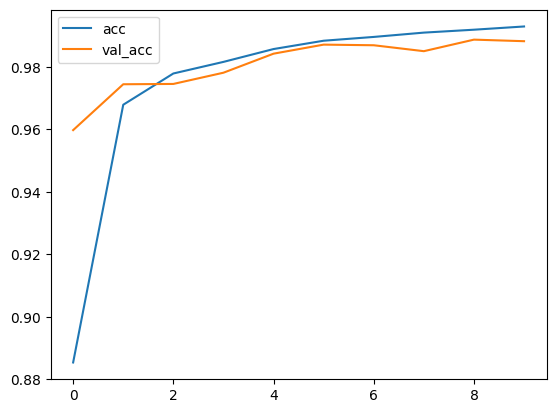

In [8]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

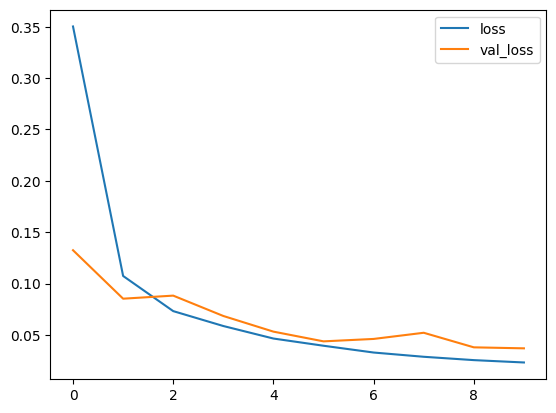

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    0    0    0    3    0    3    1    1    1]
 [   0 1125    1    1    1    1    5    1    0    0]
 [   0    0 1027    0    1    0    1    2    1    0]
 [   0    0    6 1000    0    1    0    0    1    2]
 [   0    1    0    0  964    0    7    2    2    6]
 [   0    0    0    6    0  882    2    0    0    2]
 [   1    0    1    0    0    2  953    0    1    0]
 [   0    3    8    1    1    0    0 1011    0    4]
 [   2    0    5    3    0    4    0    1  956    3]
 [   0    1    1    2    6    2    0    3    0  994]]


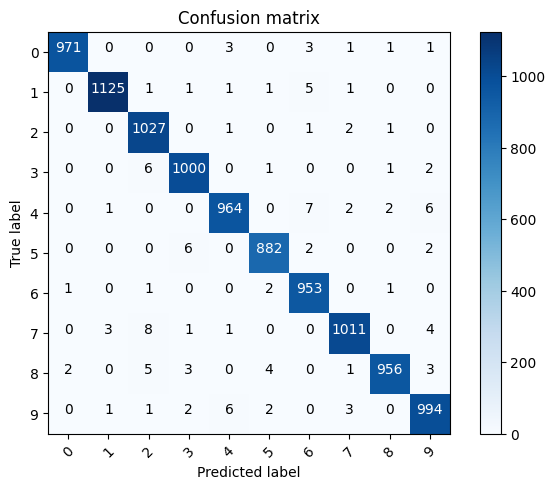

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

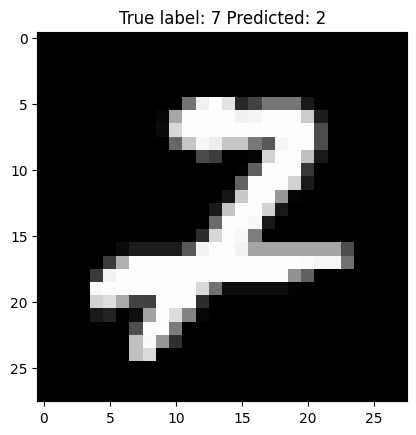

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));